In [51]:
import numpy as np
import pandas as pd

In [52]:
train_df = pd.read_csv('data/aps_failure_training_set.csv')
train_df.pop('id')

0            1
1            2
2            3
3            4
4            5
         ...  
59995    59996
59996    59997
59997    59998
59998    59999
59999    60000
Name: id, Length: 60000, dtype: int64

In [53]:
train_df

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,na,664,186,0,0,0,0,0,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,neg,2286,na,2130706538,224,0,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
59997,neg,112,0,2130706432,18,0,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
59998,neg,80292,na,2130706432,494,0,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0


In [54]:
cols = pd.Series(train_df.columns)

counts = cols.apply(lambda x: x.split("_")[0]).value_counts().to_dict()
categorical_cols_idx = cols.apply(
    lambda x: True if counts[x.split("_")[0]] > 1 else False)

#get the columns that are categorical
categorical_cols = cols[categorical_cols_idx]

categorical_cols

In [59]:
categorical_cols.apply(lambda x: x.split("_")[0]).value_counts().to_dict()

{'ag': 10, 'ay': 10, 'az': 10, 'ba': 10, 'cn': 10, 'cs': 10, 'ee': 10}

<Axes: >

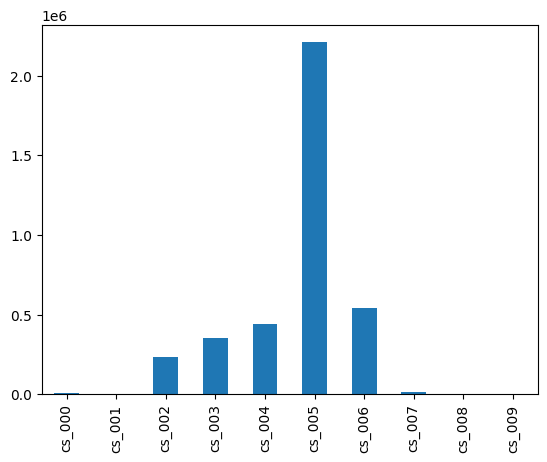

In [60]:
#given this dataset plot the means train_df.filter(regex='cs_[0-9][0-9][0-9]')
train_df.filter(regex='cs_[0-9][0-9][0-9]').replace('na', 0).astype(int).mean().plot(kind='bar')

<Axes: >

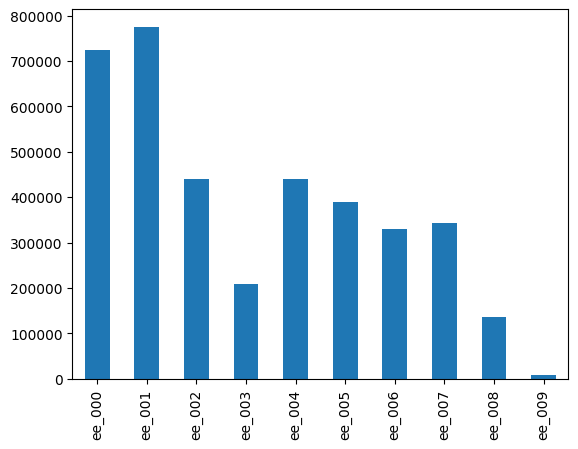

In [61]:
train_df.filter(regex='ee_[0-9][0-9][0-9]').replace('na', 0).astype(int).mean().plot(kind='bar')

<Axes: >

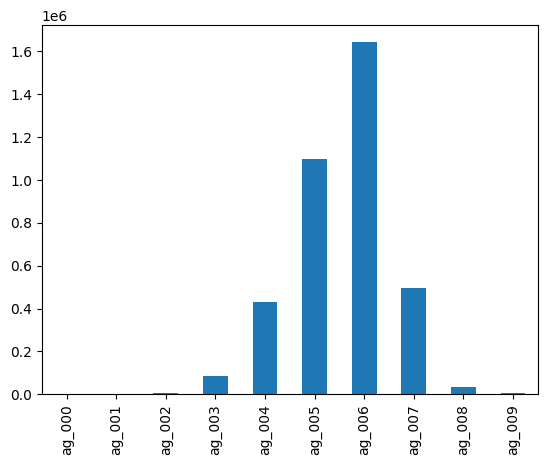

In [62]:
train_df.filter(regex='ag_[0-9][0-9][0-9]').replace('na', 0).astype(int).mean().plot(kind='bar')

<Axes: >

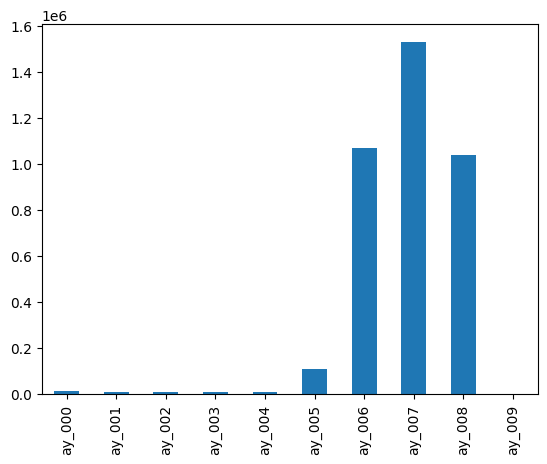

In [63]:
train_df.filter(regex='ay_[0-9][0-9][0-9]').replace('na', 0).astype(int).mean().plot(kind='bar')

<Axes: >

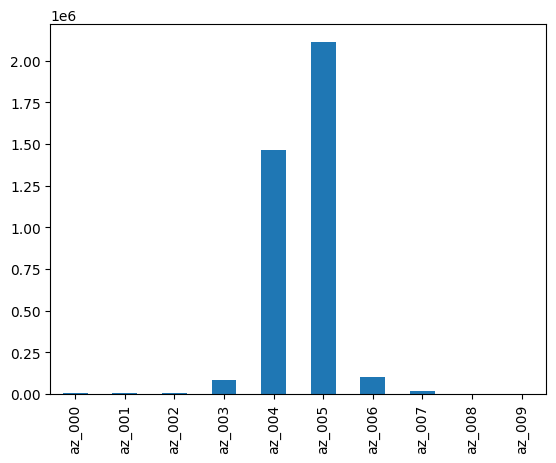

In [65]:
train_df.filter(regex='az_[0-9][0-9][0-9]').replace('na', 0).astype(int).mean().plot(kind='bar')

<Axes: >

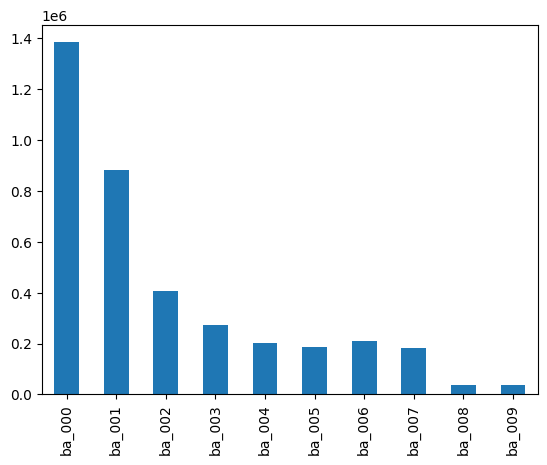

In [66]:
train_df.filter(regex='ba_[0-9][0-9][0-9]').replace('na', 0).astype(int).mean().plot(kind='bar')

<Axes: >

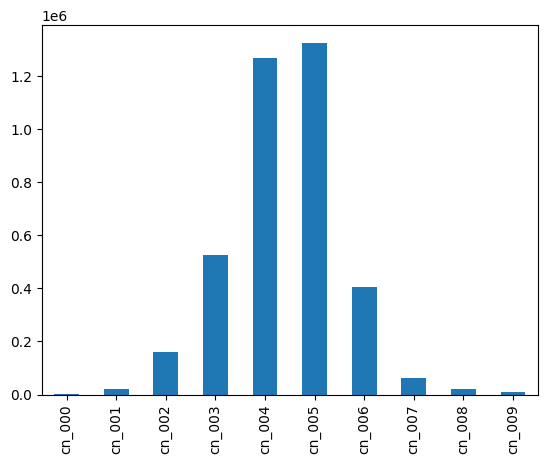

In [67]:
train_df.filter(regex='cn_[0-9][0-9][0-9]').replace('na', 0).astype(int).mean().plot(kind='bar')

In [68]:
train_df_for_corr = train_df.copy()

In [69]:
#look at the correlation between the columns against the targe
train_df_for_corr["class"] = train_df_for_corr["class"].replace(['neg', 'pos'], [0, 1])
train_df_for_corr = train_df_for_corr.replace('na', 0).astype(float).corr()

In [70]:
#get non categorical columns
numerical_columns = cols[~categorical_cols_idx]
numerical_columns = numerical_columns[2:]

In [71]:
numerical_columns

2      ab_000
3      ac_000
4      ad_000
5      ae_000
6      af_000
        ...  
156    eb_000
157     ec_00
158    ed_000
169    ef_000
170    eg_000
Length: 99, dtype: object

<Axes: >

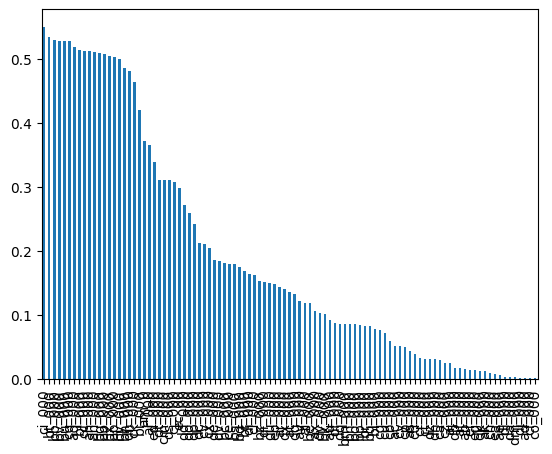

In [134]:
train_df_for_corr["class"].abs()[numerical_columns].sort_values(ascending=False).plot(kind='bar')
relevant_col_bools = train_df_for_corr["class"].abs()[numerical_columns].sort_values(ascending=False) > 0.3

In [119]:
#get the columns that are relevant
relevant_numerical_cols = relevant_col_bools[relevant_col_bools].index

In [76]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

Y = labels.apply(lambda x: 1 if x == 'pos' else 0).values
X = train_df[categorical_cols].replace('na', 0).astype(int).values
X_transformed = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_transformed, Y, test_size=0.33, random_state=42, stratify=Y)
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
clf.fit(X_train, y_train)

/Users/firatkizilboga/Projects/LFD/APS-Failure-Prediction/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial', random_state=0)

In [77]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     19470
           1       0.76      0.54      0.63       330

    accuracy                           0.99     19800
   macro avg       0.87      0.77      0.81     19800
weighted avg       0.99      0.99      0.99     19800

[[19413    57]
 [  152   178]]


In [78]:
test_df = pd.read_csv('data/aps_failure_test_set.csv')
X = test_df[categorical_cols].replace('na', 0).astype(int).values
X_transformed = StandardScaler().fit_transform(X)
y_pred_ = clf.predict(X_transformed)

In [79]:
def labelize(x):
    if x == 1:
        return 'pos'
    else:
        return 'neg'
labelize = np.vectorize(labelize)

In [80]:
output = pd.DataFrame({'id': np.arange(1,len(y_pred_)+1),"class": labelize(y_pred_)})
output.to_csv('categorical values standardized logistic regression, output.csv', index=False)

In [81]:
from preprocessing import FactorAnalysis

FA = FactorAnalysis(50)
X = train_df[categorical_cols].replace('na', 0).astype(int).values
X_transformed = StandardScaler().fit_transform(X)

FA.fit(X_transformed)
X_transformed_ = FA.transform(X_transformed)

X_train, X_test, y_train, y_test = train_test_split(X_transformed_, Y, test_size=0.33, random_state=42, stratify=Y)
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     19470
           1       0.74      0.51      0.61       330

    accuracy                           0.99     19800
   macro avg       0.87      0.75      0.80     19800
weighted avg       0.99      0.99      0.99     19800

[[19412    58]
 [  161   169]]


/Users/firatkizilboga/Projects/LFD/APS-Failure-Prediction/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [82]:
FA.explained_variance_ratio.sum()

0.9934842737430886

In [83]:
#run the same experiment with XGBoost

from xgboost import XGBClassifier

clf = XGBClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     19470
           1       0.82      0.58      0.68       330

    accuracy                           0.99     19800
   macro avg       0.91      0.79      0.84     19800
weighted avg       0.99      0.99      0.99     19800

[[19429    41]
 [  137   193]]


In [84]:
#xgboost without factor analysis

clf = XGBClassifier()
X_train, X_test, y_train, y_test = train_test_split(X_transformed, Y, test_size=0.33, random_state=42, stratify=Y)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     19470
           1       0.88      0.64      0.74       330

    accuracy                           0.99     19800
   macro avg       0.93      0.82      0.87     19800
weighted avg       0.99      0.99      0.99     19800

[[19440    30]
 [  118   212]]


Factor analysis fails.

In [85]:
#use test set to predict
X = test_df[categorical_cols].replace('na', 0).astype(int).values
X_transformed = StandardScaler().fit_transform(X)
y_pred_ = clf.predict(X_transformed)

output = pd.DataFrame({'id': np.arange(1,len(y_pred_)+1),"class": labelize(y_pred_)})
output.to_csv('categorical values standardized xgboost, output.csv', index=False)

In [123]:
#add two column types together
num_cat_cols = pd.Index(categorical_cols).append(pd.Index(relevant_numerical_cols))

In [87]:
relevant_numerical_cols

Index(['ci_000', 'bt_000', 'bb_000', 'bv_000', 'bu_000', 'cq_000', 'aq_000',
       'bj_000', 'cc_000', 'ah_000', 'an_000', 'bg_000', 'ao_000', 'bx_000',
       'ap_000', 'by_000', 'bh_000', 'dn_000', 'ck_000', 'bi_000', 'am_0',
       'al_000', 'ed_000', 'dt_000', 'cm_000', 'ds_000', 'cj_000'],
      dtype='object')

In [88]:
num_cat_cols

Index(['ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006',
       'ag_007', 'ag_008', 'ag_009', 'ay_000', 'ay_001', 'ay_002', 'ay_003',
       'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000',
       'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007',
       'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004',
       'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'cn_000', 'cn_001',
       'cn_002', 'cn_003', 'cn_004', 'cn_005', 'cn_006', 'cn_007', 'cn_008',
       'cn_009', 'cs_000', 'cs_001', 'cs_002', 'cs_003', 'cs_004', 'cs_005',
       'cs_006', 'cs_007', 'cs_008', 'cs_009', 'ee_000', 'ee_001', 'ee_002',
       'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008', 'ee_009',
       'ci_000', 'bt_000', 'bb_000', 'bv_000', 'bu_000', 'cq_000', 'aq_000',
       'bj_000', 'cc_000', 'ah_000', 'an_000', 'bg_000', 'ao_000', 'bx_000',
       'ap_000', 'by_000', 'bh_000', 'dn_000', 'ck_000', 'bi_000', 'am_0',
 

In [89]:
X = train_df[num_cat_cols].replace('na', 0).astype(float).values
X_transformed = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_transformed, Y, test_size=0.33, random_state=42, stratify=Y)

clf = XGBClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19470
           1       0.86      0.75      0.80       330

    accuracy                           0.99     19800
   macro avg       0.93      0.87      0.90     19800
weighted avg       0.99      0.99      0.99     19800

[[19431    39]
 [   83   247]]


In [90]:
#use test set to predict
X = test_df[num_cat_cols].replace('na', 0).astype(float).values
X_transformed = StandardScaler().fit_transform(X)
y_pred_ = clf.predict(X_transformed)

output = pd.DataFrame({'id': np.arange(1,len(y_pred_)+1),"class": labelize(y_pred_)})
output.to_csv('categorical+relevant numerical values standardized xgboost, output.csv', index=False)

In [91]:
#lets apply factor analysis to the numerical columns
FA = FactorAnalysis(50)

numericals = train_df[numerical_columns].replace('na', 0).astype(float).values
numericals_transformed = StandardScaler().fit_transform(numericals)

FA.fit(numericals_transformed)
numericals_transformed_ = FA.transform(numericals_transformed)
X = train_df[categorical_cols].replace('na', 0).astype(int).values
X = np.concatenate((X, numericals_transformed_), axis=1)

X_transformed = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42, stratify=Y)

In [92]:
clf = XGBClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19470
           1       0.86      0.72      0.79       330

    accuracy                           0.99     19800
   macro avg       0.93      0.86      0.89     19800
weighted avg       0.99      0.99      0.99     19800

[[19432    38]
 [   91   239]]


FA Hurts performance.

In [93]:
from preprocessing import LDA

In [124]:
X = train_df[num_cat_cols].replace('na', 0).astype(float).values
X_transformed = StandardScaler().fit_transform(X)
lda = LDA(70)
lda.fit(X_transformed, Y)
X_transformed_ = lda.transform(X_transformed)
X_train, X_test, y_train, y_test = train_test_split(X_transformed_, Y, test_size=0.33, random_state=42, stratify=Y)

(60000, 127) (127, 70)


In [95]:
clf = XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, objective='binary:logistic', booster='gbtree')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

/Users/firatkizilboga/Projects/LFD/APS-Failure-Prediction/.venv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [22:46:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.99      1.00      1.00     19470
           1       0.83      0.65      0.72       330

    accuracy                           0.99     19800
   macro avg       0.91      0.82      0.86     19800
weighted avg       0.99      0.99      0.99     19800

[[19425    45]
 [  117   213]]


In [96]:
#use keras to create a neural network
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
#use momentum optimizer
from keras.optimizers.legacy import Adam
from keras import regularizers


In [126]:
model = Sequential()

model.add(Dense(64, input_dim=X_transformed.shape[1],
                activation='relu',
                kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l1(0.01)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu',
                kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l1(0.01)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu',
                kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l1(0.01)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu',
                kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l1(0.01)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu',
                kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l1(0.01)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu',
                kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l1(0.01)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu',
                kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l1(0.01)))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

adam = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])


/Users/firatkizilboga/Projects/LFD/APS-Failure-Prediction/.venv/lib/python3.11/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [127]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(classes=np.unique(Y), y=Y, class_weight='balanced')

cw = {0: float(class_weights[0]), 1: float(class_weights[1])}

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, Y, test_size=0.33, random_state=42, stratify=Y)
model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_test, y_test), class_weight=cw)

Epoch 1/100
315/315 [==============================] - 1s 2ms/step - loss: 4.0235 - accuracy: 0.5830 - val_loss: 3.8176 - val_accuracy: 0.9026
Epoch 2/100
315/315 [==============================] - 1s 2ms/step - loss: 3.5846 - accuracy: 0.8517 - val_loss: 3.5231 - val_accuracy: 0.9338
Epoch 3/100
315/315 [==============================] - 1s 2ms/step - loss: 3.2812 - accuracy: 0.9007 - val_loss: 3.2549 - val_accuracy: 0.9480
Epoch 4/100
315/315 [==============================] - 0s 2ms/step - loss: 3.0127 - accuracy: 0.9238 - val_loss: 3.0022 - val_accuracy: 0.9526
Epoch 5/100
315/315 [==============================] - 0s 2ms/step - loss: 2.7532 - accuracy: 0.9385 - val_loss: 2.7578 - val_accuracy: 0.9553
Epoch 6/100
315/315 [==============================] - 0s 2ms/step - loss: 2.5104 - accuracy: 0.9443 - val_loss: 2.5207 - val_accuracy: 0.9595
Epoch 7/100
315/315 [==============================] - 0s 2ms/step - loss: 2.2860 - accuracy: 0.9509 - val_loss: 2.3003 - val_accuracy: 0.9608

In [132]:
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

619/619 [==============================] - 0s 331us/step
              precision    recall  f1-score   support

           0       0.99      0.58      0.74     19470
           1       0.03      0.78      0.06       330

    accuracy                           0.59     19800
   macro avg       0.51      0.68      0.40     19800
weighted avg       0.98      0.59      0.72     19800

[[11369  8101]
 [   71   259]]


In [130]:
#use test set to predict
X = test_df[num_cat_cols].replace('na', 0).astype(float).values
X_transformed = StandardScaler().fit_transform(X)
y_pred_ = model.predict(X_transformed)
y_pred_ = np.round(y_pred_)




500/500 [==============================] - 0s 343us/step


In [102]:
y_pred_.reshape(-1).shape

(16000,)

In [103]:
output = pd.DataFrame({'id': np.arange(1,len(y_pred_.reshape(-1))+1),"class": labelize(y_pred_.reshape(-1))})
output.to_csv('categorical+relevant numerical values standardized neural network, output.csv', index=False)

In [131]:
model = Sequential()

model.add(Dense(64, input_dim=X_transformed.shape[1],
                activation='relu',
                kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l1(0.01)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu',
                kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l1(0.01)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu',
                kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l1(0.01)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu',
                kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l1(0.01)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu',
                kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l1(0.01)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu',
                kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l1(0.01)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu',
                kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l1(0.01)))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

adam = Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)


/Users/firatkizilboga/Projects/LFD/APS-Failure-Prediction/.venv/lib/python3.11/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [105]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(classes=np.unique(Y), y=Y, class_weight='balanced')
X = train_df[num_cat_cols].replace('na', 0).astype(float).values
X_transformed = StandardScaler().fit_transform(X)
cw = {0: float(class_weights[0]), 1: float(class_weights[1])}
X_train, X_test, y_train, y_test = train_test_split(X_transformed, Y, test_size=0.33, random_state=42, stratify=Y)

In [106]:
model.count_params()

16769

In [107]:
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

619/619 [==============================] - 0s 321us/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     19470
           1       0.01      0.01      0.01       330

    accuracy                           0.96     19800
   macro avg       0.50      0.49      0.50     19800
weighted avg       0.97      0.96      0.97     19800

[[19088   382]
 [  327     3]]


In [108]:
500 

500

In [109]:
#use test set to predict
X = test_df[num_cat_cols].replace('na', 0).astype(float).values
X_transformed = StandardScaler().fit_transform(X)
y_pred_ = model.predict(X_transformed)
y_pred_ = np.round(y_pred_)
output = pd.DataFrame({'id': np.arange(1,len(y_pred_.reshape(-1))+1),"class": labelize(y_pred_.reshape(-1))})

output.to_csv('categorical+relevant numerical values standardized neural network with weighted binary crossentropy, output.csv', index=False)

500/500 [==============================] - 0s 323us/step


In [110]:
5060 + 20 * 500

15060

In [111]:
86 *500 + 103 * 10

44030